# Flight Ticket Pricing Analysis using Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\rahul\Downloads\airlines_flights_data.csv")

In [3]:
data

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Cleaning the data

In [4]:
data.drop(columns="index",inplace=True)

In [5]:
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Initial Data Exploration

In [6]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
# Info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [8]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [9]:
data.isnull().sum() #Checking for missing values in any columnn

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## Q.1. What are the airlines in the dataset, accompanied by their frequencies

In [10]:
#Checking how many airlines are in the dataset
data["airline"].nunique()

6

In [11]:
#Unique names of the airlines
data["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [12]:
#Airlines with their frequencies
data["airline"].value_counts(ascending=False)

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

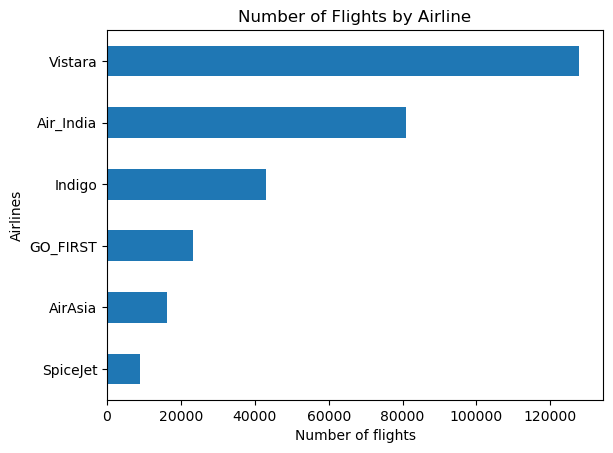

In [13]:
data["airline"].value_counts(ascending=False).plot.barh(title="Number of Flights by Airline")
plt.xlabel("Number of flights")
plt.ylabel("Airlines")
plt.gca().invert_yaxis()
plt.show()

**Insight:**  
Vistara operates the highest number of flights in the dataset, while SpiceJet has the lowest presence, indicating Vistara’s strong market coverage across routes.

## Q.2. Show Bar Graphs representing the Departure Time & Arrival Time

In [14]:
# Showing departure time for the flights
data["departure_time"].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [15]:
# Showing arrival time for the flights
data["arrival_time"].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

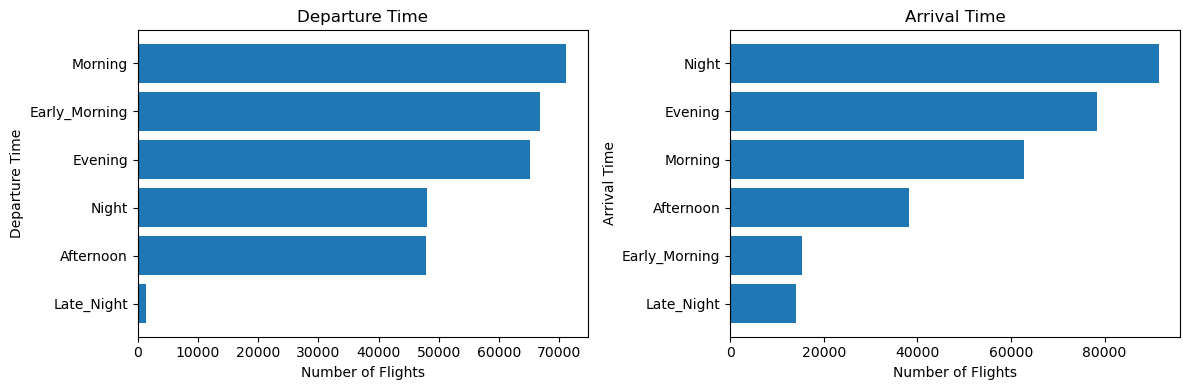

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Departure Time
dep_counts = data["departure_time"].value_counts(ascending=False)
axes[0].barh(dep_counts.index, dep_counts.values)
axes[0].set_title("Departure Time")
axes[0].set_xlabel("Number of Flights")
axes[0].set_ylabel("Departure Time")
axes[0].invert_yaxis()
# Arrival Time
arr_counts = data["arrival_time"].value_counts(ascending=False)
axes[1].barh(arr_counts.index, arr_counts.values)
axes[1].set_title("Arrival Time")
axes[1].set_xlabel("Number of Flights")
axes[1].set_ylabel("Arrival Time")
axes[1].invert_yaxis()
plt.tight_layout()
plt.show()

**Insight:**  
Most flights depart during Morning and Early Morning hours, while Night is the most common arrival time, suggesting airlines prefer early departures with later arrivals for longer routes.

## Q.3. Show Bar Graphs representing the Source City & Destination City

In [17]:
# Showing the source city of flights
data["source_city"].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [18]:
# Showing the destination city of flights
data["destination_city"].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

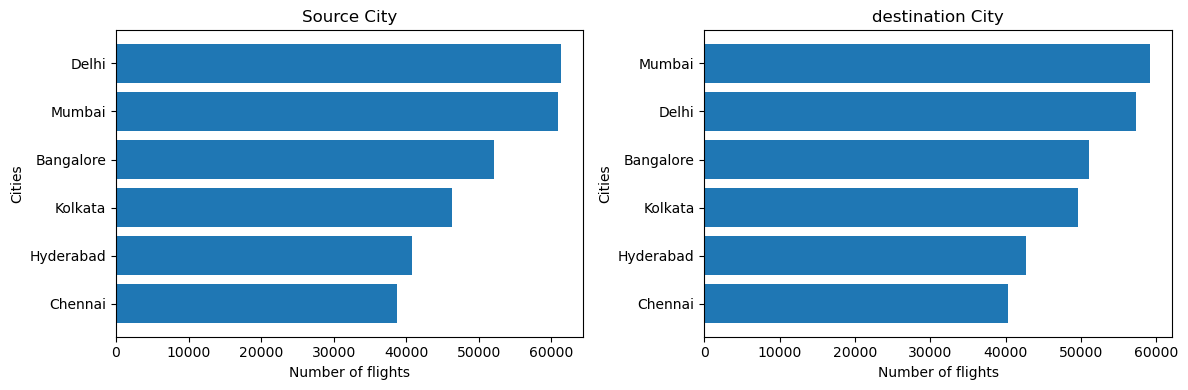

In [19]:
#Showing the source city and destination city for the flights with their counts
fig,axes=plt.subplots(1,2,figsize=(12,4))
#Source city flights
source_city_counts=data["source_city"].value_counts(ascending=False)
axes[0].barh(source_city_counts.index,source_city_counts.values)
axes[0].set_title("Source City")
axes[0].set_xlabel("Number of flights")
axes[0].set_ylabel("Cities")
axes[0].invert_yaxis()

source_city_counts=data["destination_city"].value_counts(ascending=False)
axes[1].barh(source_city_counts.index,source_city_counts.values)
axes[1].set_title("destination City")
axes[1].set_xlabel("Number of flights")
axes[1].set_ylabel("Cities")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

**Insight:**  
Delhi and Mumbai dominate both as source and destination cities, highlighting their role as major aviation hubs in India.

## Q.4. Does ticket price vary with airlines?

In [20]:
#Grouping the airlines and checking their mean price
avg_price_airline = (
    data.groupby("airline")["price"]
        .mean()
        .sort_values(ascending=False)
)

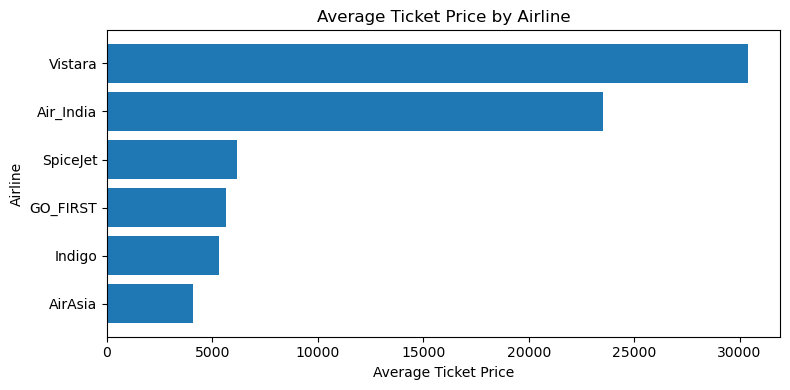

In [21]:
plt.figure(figsize=(8,4))
plt.barh(avg_price_airline.index, avg_price_airline.values)
plt.gca().invert_yaxis()
plt.xlabel("Average Ticket Price")
plt.ylabel("Airline")
plt.title("Average Ticket Price by Airline")
plt.tight_layout()
plt.show()

**Insight:**  
Vistara and Air India have significantly higher average ticket prices compared to low-cost carriers, reflecting premium service and business class offerings.

## Q.5. Does ticket price change based on the departure time and arrival time?

In [22]:
#Average price by departure time
avg_dep_price=(
    data.groupby("departure_time")["price"].mean().sort_values(ascending=False)
)

In [23]:
# Average price by arrival time
avg_arr_price = (
    data.groupby("arrival_time")["price"].mean().sort_values(ascending=False)
)

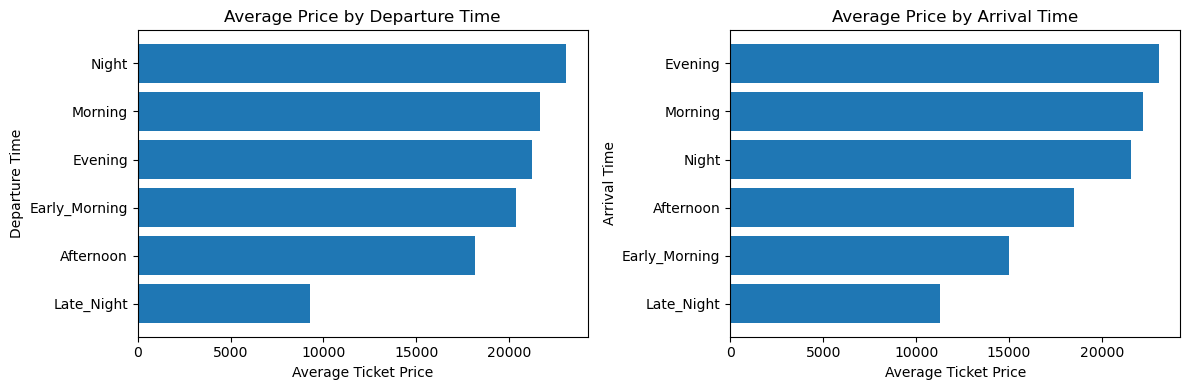

In [24]:
fig,axes=plt.subplots(1,2,figsize=(12,4))
# Departure Time
axes[0].barh(avg_dep_price.index,avg_dep_price.values)
axes[0].invert_yaxis()
axes[0].set_title("Average Price by Departure Time")
axes[0].set_xlabel("Average Ticket Price")
axes[0].set_ylabel("Departure Time")

# Arrival Time
axes[1].barh(avg_arr_price.index,avg_arr_price.values)
axes[1].invert_yaxis()
axes[1].set_title("Average Price by Arrival Time")
axes[1].set_xlabel("Average Ticket Price")
axes[1].set_ylabel("Arrival Time")

plt.tight_layout()
plt.show()

**Insight:**  
Flights departing or arriving at Night tend to have higher average prices, while Late Night flights are generally cheaper, possibly due to lower passenger demand.

## Q.6. How the price changes with change in Source and Destination?

In [25]:
#Average price by Source_city
avg_price_source=(
    data.groupby("source_city")["price"].mean().sort_values(ascending=False)
)

In [26]:
#Average price by destination
avg_price_destination=(
    data.groupby("destination_city")["price"].mean().sort_values(ascending=False)
)

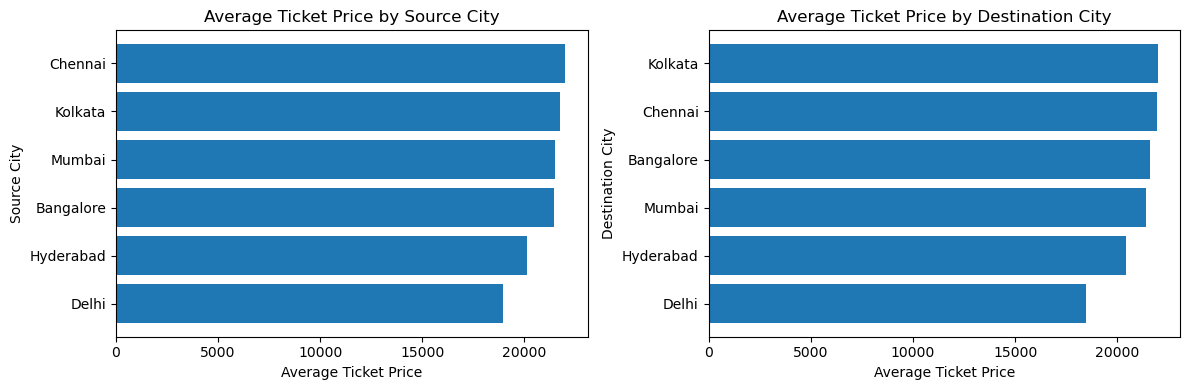

In [27]:
fig,axes=plt.subplots(1,2,figsize=(12,4))
# Source City
axes[0].barh(avg_price_source.index,avg_price_source.values)
axes[0].invert_yaxis()
axes[0].set_title("Average Ticket Price by Source City")
axes[0].set_xlabel("Average Ticket Price")
axes[0].set_ylabel("Source City")

# Destination City
axes[1].barh(avg_price_destination.index, avg_price_destination.values)
axes[1].invert_yaxis()
axes[1].set_title("Average Ticket Price by Destination City")
axes[1].set_xlabel("Average Ticket Price")
axes[1].set_ylabel("Destination City")

plt.tight_layout()
plt.show()

**Insight:**  
Flights originating from or arriving at metro cities such as Chennai and Kolkata tend to have higher average prices, indicating route-based demand and operational costs.

## Q.7. How is the price affected when tickets are bought in just 1 or 2 days before departure?

In [28]:
data["days_left"].nunique()

49

In [29]:
data["days_left"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [30]:
avg_price_days=(
    data.groupby("days_left")["price"].mean().sort_index()
)

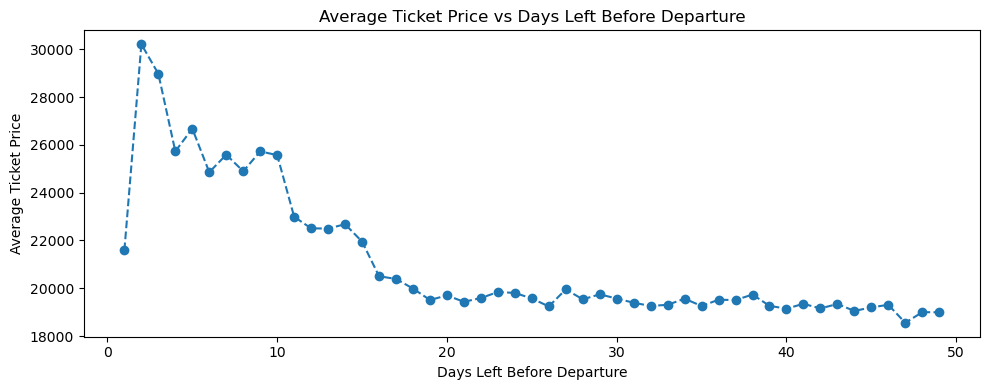

In [31]:
plt.figure(figsize=(10,4))
plt.plot(
    avg_price_days.index,
    avg_price_days.values,
    marker='o',
    linestyle='--'
)
plt.xlabel("Days Left Before Departure")
plt.ylabel("Average Ticket Price")
plt.title("Average Ticket Price vs Days Left Before Departure")
plt.tight_layout()
plt.show()

**Insight:** 
Ticket prices are highest when bookings are made close to the departure date and gradually decrease as the number of days before departure increases, confirming last-minute pricing behavior.

## Q.8. How does the ticket price vary between Economy and Business class?

In [32]:
avg_price_class=(
    data.groupby("class")["price"].mean()
)

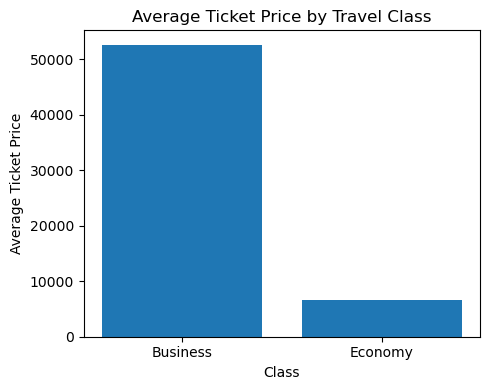

In [33]:
plt.figure(figsize=(5,4))
plt.bar(avg_price_class.index,avg_price_class.values)
plt.xlabel("Class")
plt.ylabel("Average Ticket Price")
plt.title("Average Ticket Price by Travel Class")
plt.tight_layout()
plt.show()

**Insight:**  
Business class tickets are significantly more expensive than Economy class tickets, reflecting differences in service level, comfort, and flexibility.

## Q.9. What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class ?

In [34]:
vistara_del_hyd_business=data[
    (data["airline"]=='Vistara')&
    (data["source_city"]=='Delhi')&
    (data["destination_city"]=='Hyderabad')&
    (data["class"]=='Business')
]

In [35]:
avg_price=vistara_del_hyd_business["price"].mean()

In [36]:
avg_price

np.float64(47939.840361445786)

**Result:**  
The average ticket price for a Vistara Business Class flight from Delhi to Hyderabad is ₹47,939.

**Insight:**  
For the selected route and airline, Business Class pricing remains consistently high, reinforcing the premium pricing strategy for Vistara’s business segment.